# Importing Dataset directly from kaggle

In [1]:
!pip install -q kaggle

## You can use this method

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

MessageError: ignored

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json

In [ ]:
!mkdir -p ~/.kaggle #Creating a directory

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd  #Print Working Directory

## Or you can use this method

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "joseberlin01"
os.environ['KAGGLE_KEY'] = "8cb6fe7601157ac28500c6e3ba8a4307"

In [3]:
# View datasets in kaggle
!kaggle datasets list

ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                   480KB  2023-01-04 12:50:31           2076         85  1.0              
thedevastator/global-fossil-co2-emissions-by-country-2002-2022  Emissions by Country, 2002-2022              621KB  2023-01-02 20:10:36           1129         42  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset              Fifa World Cup 2022: Complete Dataset          7KB  2022-12-18 22:51:11           5484        177  1.0              
rakkesharv/spotify-top-10000-streamed-songs                     Spotify Top 10000 Streamed Song

Here is the copied API command from Kaggle site

> This adds the zip file to the colab directory






In [4]:
!kaggle datasets download -d jessemostipak/hotel-booking-demand

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 76.1MB/s]


In [5]:
!unzip hotel-booking-demand.zip

Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [6]:
## To remove files from directory
# !rm predict-diabities.zip

# Preprocessing

## Importing and viewing dataset

In [7]:
import pandas as pd
df = pd.read_csv('hotel_bookings.csv')

In [8]:
import numpy as np

In [9]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
col = df.columns

In [14]:
from locale import normalize
for i in col:
  print(df[i].value_counts(),end="\n\n")  # To find No of value iterations
  # print(df[i].value_counts(normalize=True),end="\n\n") # To see the percentage

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

0    75166
1    44224
Name: is_canceled, dtype: int64

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     22

## Handle missing values: (Step 1)
**1]** If the missing values are few, you can remove the rows with missing values


In [15]:
## To drop all NaN row
# df = df.dropna()
## to drop specific columns
df = df.drop(['agent','company','country'],axis=1)
col = df.columns

In [16]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**2]** If the missing values are many, you can impute the missing value

>**(i)** For numerical columns, you can impute with the mean or median

In [17]:
## Impute missing values with the mean
# df['children'] = df['children'].fillna(round(df['children'].mean()))
# df = df.fillna(round(df.mean()))
## Impute missing values with the meadian 
df = df.fillna(df.median())

<ipython-input-17-21547ec1f74a>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


>**(ii)** For **categorical columns**, you can impute with the mode

In [18]:
## Impute missing values with the mode (replace with most frequent values)
# df['children'] = df['children'].fillna(df['children'].mode()[0])

>**(iii)** Regression Imputation
>> Training a regression model to predict missing values

>>req : more data

>>cons: computationally expensive

>**(iv)** K-nearest Neighbores imputation:
>> Replacing missing values with the average of values of knn.

>>**Good Choice**, if data is continuous & no clear pattern of missing values

>**(v)** Multiple Imputation: (more advanced and computationally very expensive)

>>This invloves creating multiple versions of the dataset with different imputed values for the missing data, and then analyzing the results using techniques that account for the uncertainty introduced by the imputation process.

>**3]** Use a different analysis method:
>> Some analysis methods are more robust to missing values than others. For example, decision trees and random forests can handle missing values internally and do not require imputation. In these cases, you may be able to simply use the analysis method directly on the dataset with missing values.

##Data Transformation (step 2)
Data transformation is known as modifying the format, organization, or values of data to achieve better data quality

### (i) Normalization
Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.

One of the popularly use normalizing function is MinMaxScalar

In [ ]:
from sklearn import preprocessing

scalar = preprocessing.MinMaxScaler(feature_range=(0,2))

data = scalar.fit_transform(df[col[5:9]])

sdata = pd.DataFrame(data, columns=col[5:9])

sdata.head()

,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights
0,1.0,0.0,0.0,0.00
1,1.0,0.0,0.0,0.00
2,1.0,0.0,0.0,0.04
3,1.0,0.0,0.0,0.04
4,1.0,0.0,0.0,0.08


### (ii) Scaling Features
When your data has different values, and even different measurement units, it can be difficult to compare them. So we can use Scaling fetures to make them easier to compare

Using Standardization

In [ ]:
df[col[9:15]].head()

,adults,children,babies,meal,market_segment,distribution_channel
0,2,0.0,0,BB,Direct,Direct
1,2,0.0,0,BB,Direct,Direct
2,1,0.0,0,BB,Direct,Direct
3,1,0.0,0,BB,Corporate,Corporate
4,2,0.0,0,BB,Online TA,TA/TO


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df[col[9:11]]

scaled = scaler.fit_transform(data)

print(scaled)

[[ 0.24789727 -0.26065863]
 [ 0.24789727 -0.26065863]
 [-1.47844749 -0.26065863]
 ...
 [ 0.24789727 -0.26065863]
 [ 0.24789727 -0.26065863]
 [ 0.24789727 -0.26065863]]


### (iii) Encoding
encoding refers to the process of converting data into a format that can be understood by a machine learning model. This can include converting text to numerical values, images to arrays of pixel values, or audio to spectrograms.

#### 1) One-Hot encoding:


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Input data

data = np.array(df['meal']).reshape(-1,1)

# One-hot encoding
encoder = OneHotEncoder()
onehot = encoder.fit_transform(data)

# Output is a sparse matrix
print(onehot.toarray())

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


####2) Normalization:
Normalization is a technique used to scale the values of a dataset to a specific range. This is typically done by transforming the data so that it has a mean of 0 and a standard deviation of 1. This is also known as standardization.

Z-score normalizarion

In [ ]:
from scipy.stats import zscore
# Input data
data = df['adr']

# Z-score normalization
normalized_data = zscore(data)

# Output is an array of normalized values with mean=0 and std=1
print(normalized_data)

0        -2.015038
1        -2.015038
2        -0.530935
3        -0.530935
4        -0.075810
            ...   
119385   -0.112616
119386    2.445779
119387    1.105733
119388    0.050833
119389    0.976913
Name: adr, Length: 119390, dtype: float64


#### 3)Feature Extraction
This is used for image and audio data, where the raw data is transformed into a set of features that can be used as input for a model. This can include extracting the edges of an image, or the frequency of different sounds in an audio file.

In [ ]:
from skimage.feature import hog
from skimage import data, color
from PIL import Image as im

# Input image
image = data.astronaut()

# Feature extraction
features = hog(color.rgb2gray(image), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3))
# print(features)

dat = im.fromarray(image)
dat.save('g.png')

# Output is an array of features
print(features)


[0.26033938 0.10213443 0.         ... 0.07000649 0.10599239 0.03470448]


In [ ]:
# !rm 'g.png'

####4)Encoding for sequential data:
Encoding for sequential data is a technique used to convert sequences of data such as text, speech, or time series data into a format that can be understood by a machine learning model.

This method we use here is called word embeddings which is for NLP (for example word2vec, GloVe), encoder-decoder based architectures for sequence-to-sequence tasks

In [25]:
from gensim.models import Word2Vec

# Input data
sentences = [['this', 'is', 'a', 'sentence'],
             ['this', 'is', 'another', 'sentence']]

# Encoding
model = Word2Vec(sentences, min_count=1)

# Output is the word embeddings for the input data
print(model['sentence'])

[-2.6696187e-03 -9.5846888e-04  1.0932911e-03  2.2190232e-03
 -4.8692375e-03  3.8562480e-03 -1.3467693e-03  1.5599282e-03
 -7.2100043e-04  4.5147687e-03 -1.3314672e-03  1.0926225e-03
  3.0877423e-03 -1.8718316e-03  3.4408392e-03  4.0128562e-03
  3.1056490e-03  1.6945032e-03 -1.6067340e-03  4.6799681e-03
  4.0572672e-03  1.6116552e-03 -4.7199479e-03 -4.6432391e-03
  4.4248449e-03 -2.7955137e-03 -4.5140143e-03 -2.1458250e-03
 -3.3122059e-03 -4.0934491e-04  2.7532286e-03 -3.0352622e-03
 -4.1867318e-03  1.6894257e-03  4.3021608e-03  1.8832793e-03
 -3.3294153e-03  3.9876262e-03 -2.7100581e-03  3.2841971e-03
  3.4756637e-03  3.4957747e-03  3.9920839e-03  3.1780398e-03
 -3.5821253e-03  1.6686987e-03  3.8215390e-03  3.9545656e-03
 -4.4657500e-03  6.3208900e-05  2.9304663e-03  4.7433600e-03
 -2.1191821e-03 -4.9705245e-03  2.2011881e-03 -3.6949492e-03
  4.6768240e-03  1.2516283e-03  2.1227910e-03  9.3270984e-04
  3.9664004e-03  6.9967250e-04  8.4430474e-04 -2.8925163e-03
  3.1825956e-03 -1.20264

<ipython-input-25-4378f003a0bb>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


## Data Reduction (Step 3)
Dropping unwanted columns and duplicate items

Here we're going to be trying to find the required car parking spaces

In [ ]:
df.drop(['is_canceled','arrival_date_year','arrival_date_month'],axis=1)

In [ ]:
for i in range(len(col)):
  print("\n",i,"\n",df[col[i]].value_counts())

**Dropping duplicate rows**

In [ ]:
df.drop_duplicates()

## Data splitting: (Step 4)
 Dividing the data into training, validation, and test sets

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(df.drop(columns=['label']), df['label'], test_size=0.2, random_state=42)

## Data Augmentation: (Step 5)
Data augmentation is a technique used to artificially increase the size of a dataset by applying random transformations to existing samples. This is typically done to prevent overfitting in machine learning models, especially when working with image data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2)

# Apply random transformations to the training data
datagen.fit(train_data)

## Outliers : (last step)
Outliers are observations in a dataset that are significantly different from the majority of the data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(len(col)):
  print(i,col[i],end="\t")

0 hotel	1 is_canceled	2 lead_time	3 arrival_date_year	4 arrival_date_month	5 arrival_date_week_number	6 arrival_date_day_of_month	7 stays_in_weekend_nights	8 stays_in_week_nights	9 adults	10 children	11 babies	12 meal	13 country	14 market_segment	15 distribution_channel	16 is_repeated_guest	17 previous_cancellations	18 previous_bookings_not_canceled	19 reserved_room_type	20 assigned_room_type	21 booking_changes	22 deposit_type	23 agent	24 company	25 days_in_waiting_list	26 customer_type	27 adr	28 required_car_parking_spaces	29 total_of_special_requests	30 reservation_status	31 reservation_status_date	

###Identifying the outliers
There are several ways to identify outliers in a dataset:

####(i)Vizualization


**Using Boxplot**

Here the outliers will be the points outside the main box

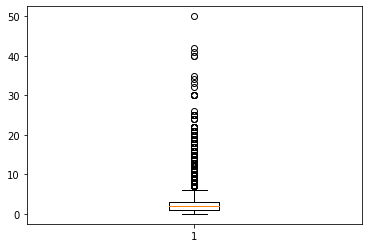

In [ ]:
## creating bosplot for df
# for i in range(5,9):
#   print(df[col[i]].head(5))
#   plt.boxplot(df[col[i]])
#   plt.show()
plt.boxplot(df['required_car_parking_spaces'])
plt.show()

**Using Scatter Plot**

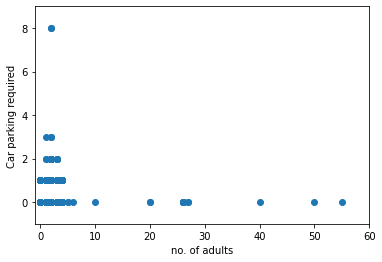

In [ ]:
plt.scatter(df['adults'],df['required_car_parking_spaces'])
plt.xlabel('no. of adults')
plt.ylabel('Car parking required')
plt.axis([-1,60,-1,9]) # if u want to zoom in or zoom out
plt.show()

#### (ii) Using summary statistics such as the mean and standard deviation to identify outliers

In [ ]:
def identify_outliers(data):
  mean = np.mean(data)
  std = np.std(data)
  outliers = []
  for i in range(len(data)):
    if data[i] > mean + 3 * std or data[i] < mean - 3 * std:
      outliers.append(data[i])
  return outliers
  
outliers = identify_outliers(df['required_car_parking_spaces'])
print(outliers)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### (iii) Outlier detection algorithms
One popular algorithm is the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm, which can be used to identify clusters of points in a dataset and identify points that are significantly different from the rest of the data.

In [ ]:
from sklearn.cluster import DBSCAN

# Use DBSCAN to identify clusters and outliers
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(np.array(df['required_car_parking_spaces'])[25000:35000].reshape(-1,1))
outliers = np.where(clusters == -1)[0]
print(outliers)

[4045 4046]


In [ ]:
df['required_car_parking_spaces'][25000+4045] # where df[25000] is considered as the outliers[0]
# np.std(df['required_car_parking_spaces'])

8

### Handling Outliers

#### (i) Removing outliers using IQR (Interquartile Range) method
This involves identifying and removing observations that are extremely different from the rest of the data. This approach is simple and can be effective, but **it can also lead to a loss of important information if the outliers are not truly errors.**

In [36]:
import numpy as np

# Remove outliers using the interquartile range (IQR) method
def remove_outliers(data):

    #Sort the dataset
    data = sorted(data)

    #Calculate quartiles
    '''The IQR method works by first dividing the dataset into quarters, so that 
    the lowest 25% of the data is in one "quartile," the next 25% is in another'''
    Q1, Q3 = np.percentile(data, [25, 75])

    #Calculate IQR
    '''The IQR is then the range of values that falls in between the middle 
    two quartiles, or the "middle 50%" of the data'''
    IQR = Q3 - Q1

    #Determine inner fence
    '''Outliers are defined as values that fall outside of a range, which is 
    calculated by taking the value of the middle 50% of the data and adding or
     subtracting a certain amount, known as "inner fences". This inner fence's 
     values is calculated as (Q1 - 1.5*IQR) to (Q3 + 1.5*IQR)'''
    inner_fence_low = Q1 - 1.5 * IQR
    inner_fence_high = Q3 + 1.5 * IQR

    #Remove outliers
    '''Any value that falls outside of this range is considered an outlier and removed from the dataset.'''
    data = [x for x in data if x > inner_fence_low and x < inner_fence_high]
    
    return data

data = df['stays_in_week_nights']
data1 = remove_outliers(data)
print(len(data1),len(df['stays_in_week_nights']))
print(data1)

114537 119390
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

#### (ii) Clipping outliers:
Clipping outliers refers to the process of **replacing extreme values in a dataset with a threshold value**. This is done to prevent the outliers from having a disproportionate impact on the analysis or model.

In [ ]:
import numpy as np

# original dataset
data = df['required_car_parking_spaces']

# threshold value
threshold = 95

# use numpy.clip() to replace all values above the threshold with the threshold value
clipped_data = np.clip(data, a_min=None, a_max=threshold)

print(pd.array(clipped_data).value_counts())
# Output: [ 1  2  3  4  5 95  6  7  8  9 10]


0    111974
1      7383
2        28
8         2
3         3
dtype: int64


#### (iii) Transforming data
Some models are sensitive to outliers, In that case, You can use various mathematical functions to transform the data in order to make the outliers less extreme. Eg we can use Log, square root, reciprocal etc.,

>Here I'll be using Square root to transform the data

In [ ]:
import numpy as np
# Sample data
data = df['required_car_parking_spaces']

# Taking square root of data
transformed_data = np.round(np.sqrt(data))

print(transformed_data)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: required_car_parking_spaces, Length: 119390, dtype: float64
